# Install Pycaret

In [1]:
!pip install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1 -qq
#sovle the error "from pycaret.classification import *" in colab : https://stackoverflow.com/questions/72090241/unable-to-resolve-import-error-from-pycaret

# Load dataset

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
from pycaret.classification import *
import numpy as np
msk = np.random.rand(len(df)) < 0.75
train = df[msk]
test = df[~msk]

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [4]:
print(train.shape)

(104, 5)


In [5]:
train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


# Training environment setup

In [6]:
clf1 = setup(data = train, 
             target = "target",
             silent = True,
             remove_outliers = True,
             feature_selection = True)

,Description,Value
0,session_id,7965
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(104, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


# Find top 5 models in the given dataset using compare_models()

In [7]:
top5_models = compare_models(fold = 10, round = 3, sort = 'Accuracy', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.986,0.994,0.989,0.990,0.986,0.979,0.981,0.011
knn,K Neighbors Classifier,0.971,0.974,0.972,0.980,0.970,0.956,0.961,0.113
qda,Quadratic Discriminant Analysis,0.971,0.994,0.956,0.965,0.965,0.954,0.960,0.011
lr,Logistic Regression,0.957,0.994,0.939,0.955,0.950,0.931,0.940,0.250
nb,Naive Bayes,0.957,1.000,0.961,0.970,0.956,0.935,0.943,0.011
et,Extra Trees Classifier,0.957,1.000,0.939,0.955,0.950,0.931,0.940,0.398
lightgbm,Light Gradient Boosting Machine,0.957,0.990,0.944,0.956,0.951,0.933,0.941,0.048
dt,Decision Tree Classifier,0.943,0.955,0.928,0.945,0.935,0.910,0.921,0.011
ada,Ada Boost Classifier,0.943,0.991,0.928,0.945,0.935,0.910,0.921,0.070
gbc,Gradient Boosting Classifier,0.943,0.984,0.928,0.945,0.935,0.910,0.921,0.148


In [8]:
print(top5_models)

[LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'), QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7965, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), GaussianNB(priors=None, var_smoothing=1e-09)]


# Create model

In [9]:
lgbm  = create_model('lightgbm') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,1.0000,0.6667,0.7500,0.7959,0.7500,0.7826
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8571,1.0000,0.8889,0.9048,0.8571,0.7879,0.8125
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.8571,0.9036,0.8889,0.9048,0.8571,0.7879,0.8125
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


# Tuned model

In [10]:
tuned_lightgbm = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,1.0000,0.6667,0.7500,0.7959,0.7500,0.7826
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8571,1.0000,0.8889,0.9048,0.8571,0.7879,0.8125
3,0.8571,1.0000,0.8333,0.8929,0.8435,0.7742,0.8018
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.8571,0.9036,0.8889,0.9048,0.8571,0.7879,0.8125
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


# Plot model

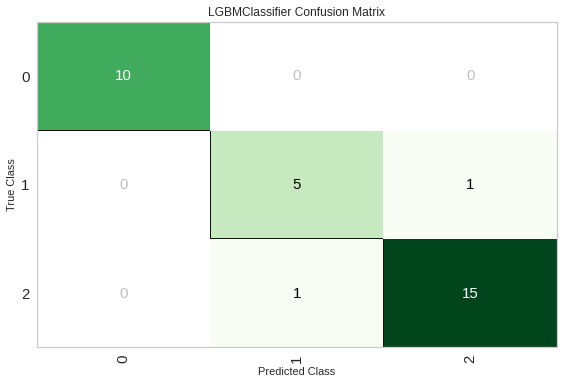

In [11]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

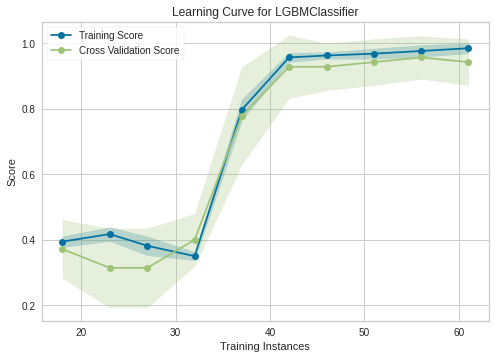

In [12]:
plot_model(estimator = tuned_lightgbm, plot = 'learning')

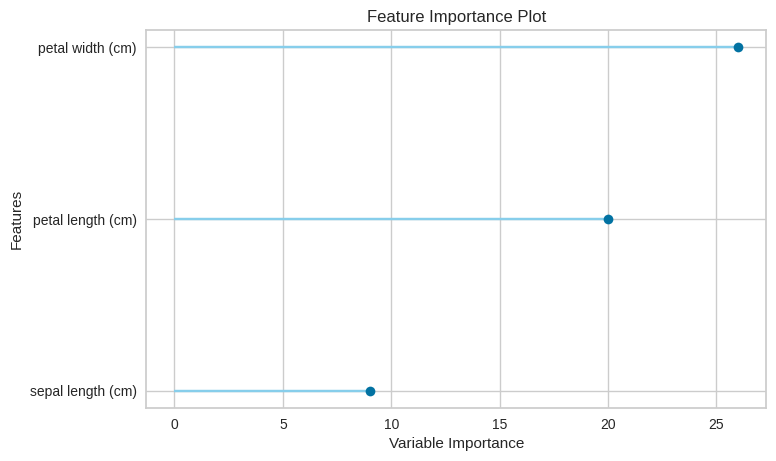

In [15]:
plot_model(estimator = tuned_lightgbm, plot = 'feature')

In [16]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Predict the test data using model

In [17]:
pred_lgbm = predict_model(tuned_lightgbm, data=test)
pred_lgbm['preds'] = pred_lgbm['Label']

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9565,0.9905,0.9582,0.9565,0.9565,0.9346,0.9346


# Model save and Model load

In [18]:
save_model(tuned_lightgbm, 'lgbm_saved')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                 colsample_bytree=1.0, feature_fraction=0.9,
                                 importance_type='split', learning_rate=0.3,
                                 max_depth=-1, min_child_samples=16,
                                 min_child_weight=0

In [19]:
lgbm_saved = load_model('lgbm_saved')

Transformation Pipeline and Model Successfully Loaded


In [20]:
lgbm_saved

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                                colsample_bytree=1.0, feature_fraction=0.9,
                                importance_type='split', learning_rate=0.3,
                                max_depth=-1, min_child_samples=16,
                                min_child_weight=0.001, min_split_g